In [ ]:
!pip install -U fashion-clip gdown

In [ ]:
!gdown https://drive.google.com/uc?id=1DgWYx8owxq9KJmVgn_GDU37n3tBuDPe7

!unzip /content/data.zip

In [ ]:
import pandas as pd
import numpy as np
from fashion_clip.fashion_clip import FashionCLIP
from IPython.display import display
from PIL import Image

# Load the dataset and preprocess image paths

In [5]:
df = pd.read_csv("/content/data/data.csv")
df['image_path'] = df['image_path'].str.replace('\\', '/')
df['image_path'] = '/content/' + df['image_path']

In [6]:
df

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,image_path
0,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,/content/data/images/108775044.jpg
1,176754003,176754,2 Row Braided Headband (1),74,Hair/alice band,Accessories,1010016,Solid,17,Yellowish Brown,...,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Two-strand hairband with braids in imitation s...,/content/data/images/176754003.jpg
2,189634031,189634,Long Leg Leggings,273,Leggings/Tights,Garment Lower body,1010016,Solid,93,Dark Green,...,D,Divided,2,Divided,51,Divided Basics,1002,Jersey Basic,Leggings in stretch jersey with an elasticated...,/content/data/images/189634031.jpg
3,194270044,194270,HELENA 2-pack tanktop,253,Vest top,Garment Upper body,1010016,Solid,51,Light Pink,...,I,Children Sizes 134-170,4,Baby/Children,79,Girls Underwear & Basics,1002,Jersey Basic,Tops in soft organic cotton jersey.,/content/data/images/194270044.jpg
4,203027047,203027,Linni tee (1),255,T-shirt,Garment Upper body,1010017,Stripe,10,White,...,D,Divided,2,Divided,51,Divided Basics,1002,Jersey Basic,Short-sleeved top in jersey with sewn-in turn-...,/content/data/images/203027047.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,943454001,943454,Mary tuxedo blazer.,264,Blazer,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,11,Womens Tailoring,1008,Dressed,Straight-cut jacket in a crêpe weave with a sa...,/content/data/images/943454001.jpg
3100,946764002,946764,Fred knitted cardigan,245,Cardigan,Garment Upper body,1010010,Melange,17,Yellowish Brown,...,A,Ladieswear,1,Ladieswear,18,Womens Trend,1003,Knitwear,Oversized cardigan knitted in a soft wool blen...,/content/data/images/946764002.jpg
3101,948152001,948152,BELL w. skirt set,270,Garment Set,Garment Full body,1010001,All over pattern,22,Yellow,...,H,Children Sizes 92-140,4,Baby/Children,79,Girls Underwear & Basics,1002,Jersey Basic,Set with a long-sleeved top and a skirt in sof...,/content/data/images/948152001.jpg
3102,949551001,949551,Virgo sweater fast buy,252,Sweater,Garment Upper body,1010016,Solid,9,Black,...,D,Divided,2,Divided,53,Divided Collection,1005,Jersey Fancy,"Short, boxy-style top in sweatshirt fabric mad...",/content/data/images/949551001.jpg


# Initialize FashionCLIP model

In [7]:
images = df["image_path"].tolist()
texts = df["detail_desc"].tolist()

# Encode images and text descriptions

In [43]:
fclip = FashionCLIP('fashion-clip')

image_embeddings = fclip.encode_images(images, batch_size=32)
text_embeddings = fclip.encode_text(texts, batch_size=32)

100%|██████████| 97/97 [12:58<00:00,  8.02s/it]


Map:   0%|          | 0/3104 [00:00<?, ? examples/s]

100%|██████████| 97/97 [07:16<00:00,  4.50s/it]


In [9]:
# np.save('image_embeddings.npy', image_embeddings)
# np.save('text_embeddings.npy', text_embeddings)

# image_embeddings = np.load('image_embeddings.npy')
# text_embeddings = np.load('text_embeddings.npy')

# display images given their article IDs

In [44]:
def show_images(article_ids, fixed_height=224):
    images = []
    for article_id in article_ids:
        image_path = f"/content/data/images/{article_id}.jpg"
        image = Image.open(image_path)
        height_percent = (fixed_height / float(image.size[1]))
        width_size = int((float(image.size[0]) * float(height_percent)))
        image = image.resize((width_size, fixed_height), Image.NEAREST)
        images.append(image)

    for img in images:
        display(img)

# Text-to-Image Retrieval:

1. Encode the text query using FashionCLIP.
2. Compute the similarity between the text embedding and all image embeddings.
3. Retrieve the top 5 most similar images.

In [45]:
def text_to_image(text, fixed_height=224):
    text_embedding = fclip.encode_text([text], batch_size=32)[0]

    similarities = text_embedding.dot(image_embeddings.T)
    top_5_indices = np.argsort(similarities)[-5:][::-1]
    found_images = df["article_id"].iloc[top_5_indices].tolist()

    return found_images

## Example 1

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

1it [00:00,  5.35it/s]


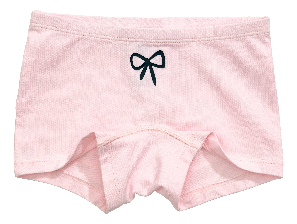

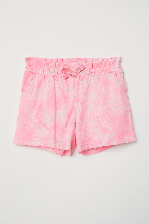

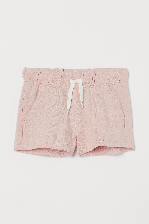

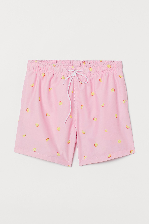

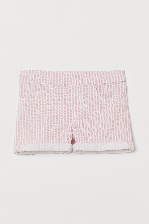

In [27]:
found_images = text_to_image("a pair of pink shorts")
show_images(found_images)

## Example 2

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

1it [00:00,  5.20it/s]


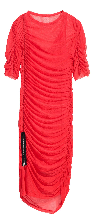

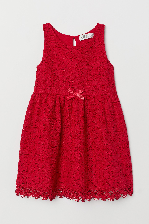

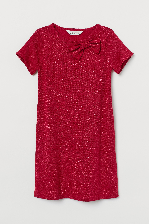

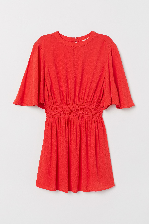

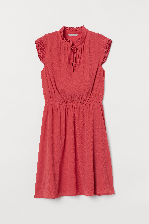

In [31]:
found_images = text_to_image("a red dress")
show_images(found_images)

## Example 3

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

1it [00:00,  4.78it/s]


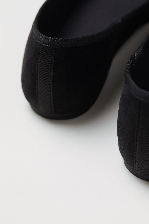

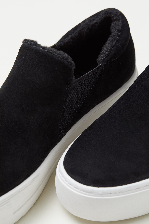

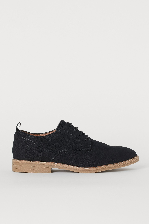

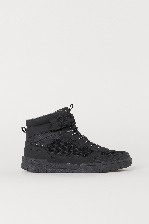

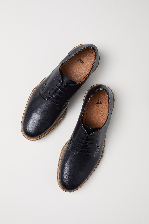

In [41]:
found_images = text_to_image("black men's shoes")
show_images(found_images)

# Image-to-Image Retrieval:

1. Load and preprocess the input image.
2. Encode the input image using FashionCLIP.
3. Compute the similarity between the input image embedding and all image embeddings.
4. Retrieve the top 5 most similar images.

In [28]:
def image_to_image(input_image_path, fixed_height=224):
    input_image = Image.open(input_image_path)
    input_image = input_image.resize((fixed_height, fixed_height), Image.NEAREST)  # Resize input image to fixed height
    input_image_embedding = fclip.encode_images([input_image], batch_size=1)[0]

    similarities = input_image_embedding.dot(image_embeddings.T)
    top_5_indices = np.argsort(similarities)[-5:][::-1]
    found_images = df["article_id"].iloc[top_5_indices].tolist()

    return found_images

## Example 1

100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


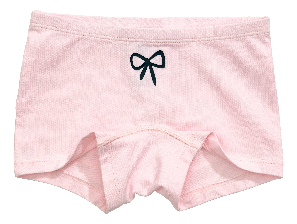

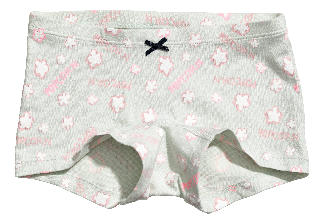

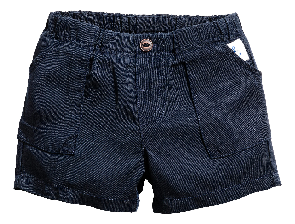

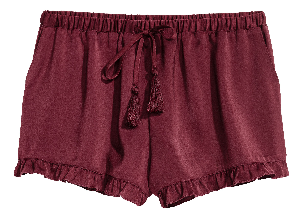

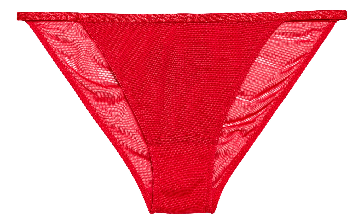

In [30]:
found_images = image_to_image("/content/data/images/395864064.jpg")
show_images(found_images)